In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [3]:
path = r'C:\Users\nickr\OneDrive\Documents\Nick Bootcamp\Machine Learning\Data Sets'

In [7]:
climate = pd.read_csv(os.path.join(path, 'weather_data_scaled.csv'))

In [15]:
pleasantweather = pd.read_csv(os.path.join(path, 'Weather_Prediction_Pleasant_Weather.csv'))

In [17]:
#Reduce to just the temperature variables (excluding Gdansk, Roma,Tours)
df = climate[['DATE', 'MONTH', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
              'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max',
              'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
              'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max',
              'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_max',
              'HEATHROW_temp_mean', 'HEATHROW_temp_min', 'HEATHROW_temp_max',
              'KASSEL_temp_mean', 'KASSEL_temp_min', 'KASSEL_temp_max',
              'LJUBLJANA_temp_mean', 'LJUBLJANA_temp_min', 'LJUBLJANA_temp_max',
              'MAASTRICHT_temp_mean', 'MAASTRICHT_temp_min', 'MAASTRICHT_temp_max',
              'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max',
              'MUNCHENB_temp_mean', 'MUNCHENB_temp_min', 'MUNCHENB_temp_max',
              'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max',
              'SONNBLICK_temp_mean', 'SONNBLICK_temp_min', 'SONNBLICK_temp_max',
              'STOCKHOLM_temp_mean', 'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max',
              'VALENTIA_temp_mean', 'VALENTIA_temp_min', 'VALENTIA_temp_max']].copy()

In [19]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [21]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [25]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [29]:
from sklearn.multioutput import MultiOutputClassifier

In [35]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE


i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

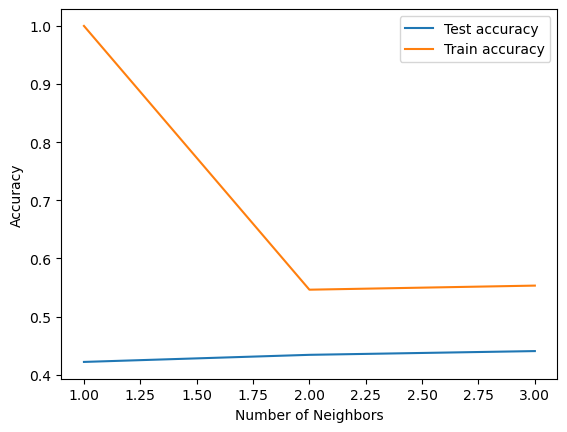

In [43]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

C:\Users\nickr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


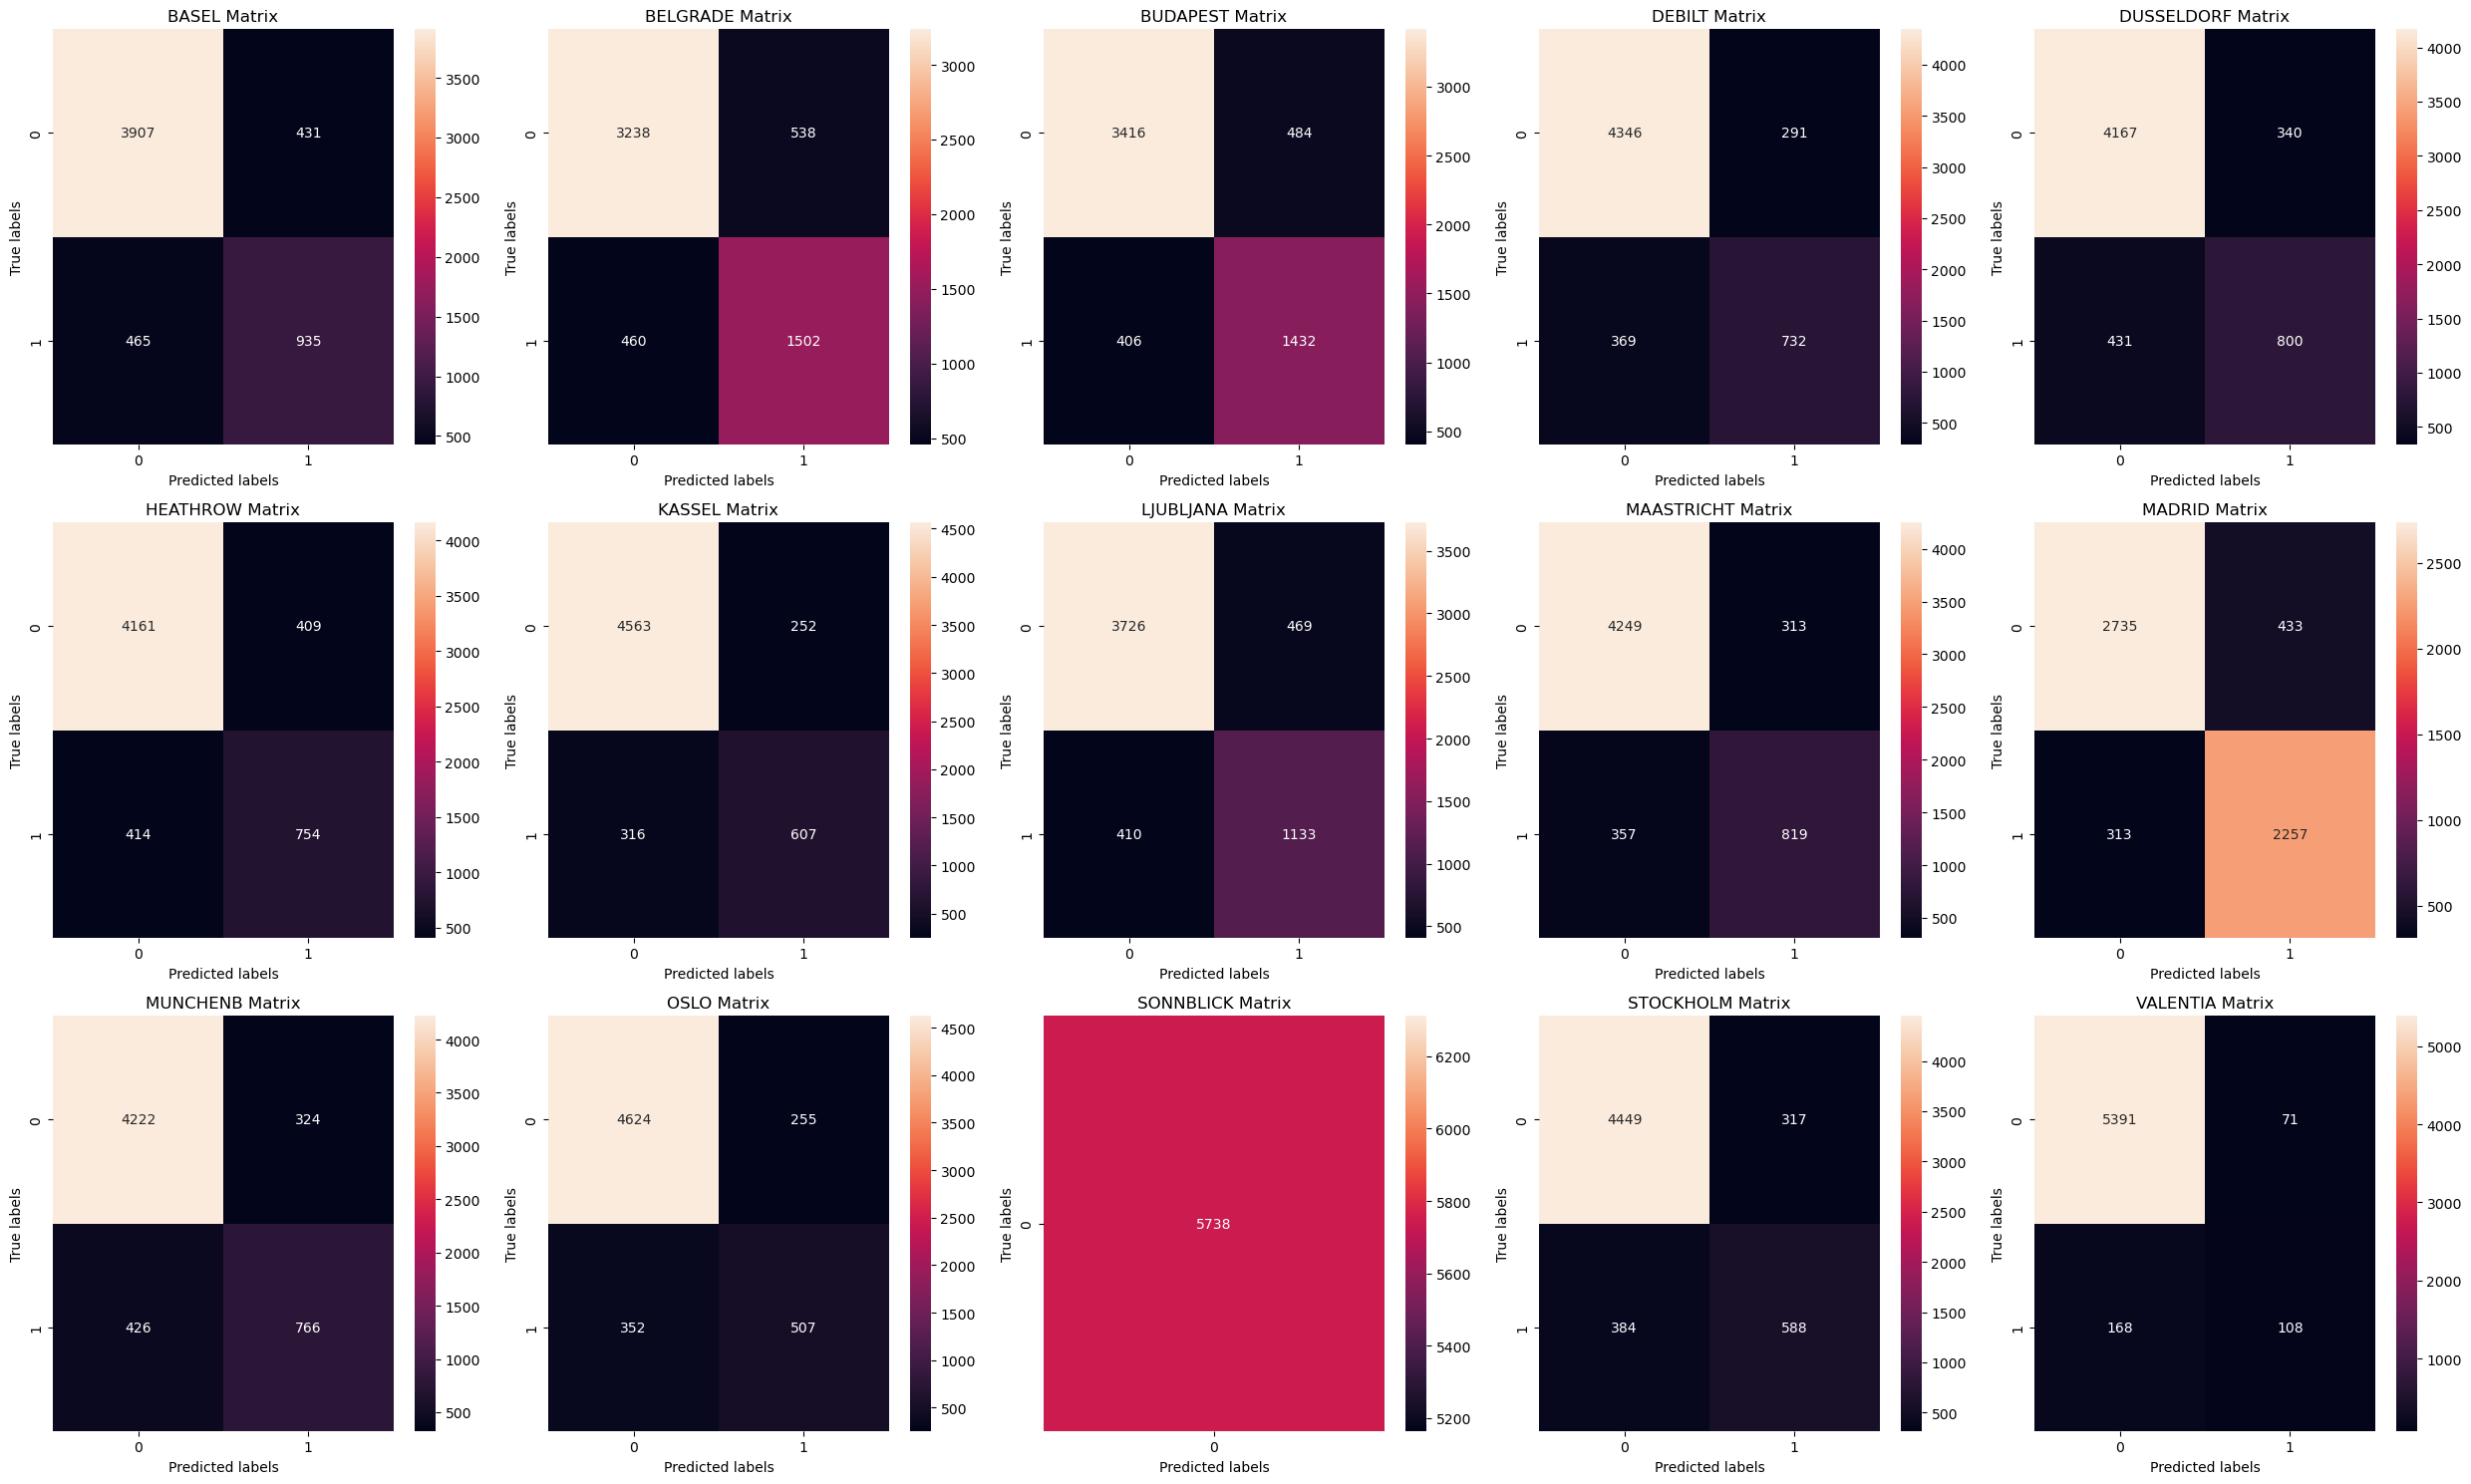

In [57]:
# Confusion Matrix
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']
figure, ax = plt.subplots(3, 5, figsize=(25,15)) 
count = 0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[:, count], y_pred[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        # Labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(name + ' Matrix')
        count += 1
plt.tight_layout()
plt.show()